In [16]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [17]:
houses_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [18]:
houses_df['firstandbsmtsf'] = houses_df['totalbsmtsf'] + houses_df['firstflrsf']

import statsmodels.api as sm
X = houses_df[['overallqual','firstandbsmtsf','grlivarea','garagecars','garagearea']]
Y = houses_df['saleprice']
# We need to manually add a constant
# in statsmodels' sm
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()

results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     735.2
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:56:56   Log-Likelihood:                -13993.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1162   BIC:                         2.803e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.042e+05   5234.078    -19.904      0.000   -1.14e+05   -9.39e+04
overallqual     2.521e+04   1199.281     21.023      0.000    2.29e+04    2.76e+04
firstandbsmtsf    16.2119      1.826      8.878      0.000      12.629      19.795
grlivarea         39.5945      2.841     13.939      0.000      34.021      45.168
garagecars      1.528e+04   3442.539      4.438      0.000    8522.988     2.2e+04
garagearea        16.8342     11.657      1.444      0.149      -6.036      39.704
==============================================================================
Omnibus:                      371.766   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27883.815
Skew:                          -0.524   Prob(JB):                         0.00
Kurtosis:                      26.914   Cond. No.                     1.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Model performs a bit better on the training set than ov

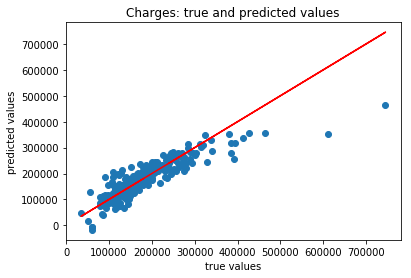

Mean absolute error of the prediction is: 26160.94410048078
Mean squared error of the prediction is: 1578938673.9720562
Root mean squared error of the prediction is: 39735.86130904999
Mean absolute percentage error of the prediction is: 16.21402036094398


In [19]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


I believe the model is performing very well with regard to these evaluation techniques in this checkpoint. The mean absolute percentage error is low at 16.2, and viewing the scatterplot you can see the model is predicting the values fairly well in all ranges minus the very top.